In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import psycopg2 as pg2

In [5]:
conn = pg2.connect(dbname='nhl', user='postgres', host='localhost', port='5435')
cur = conn.cursor()

In [12]:
query = '''
SELECT * 
FROM pst;
'''

query_c = '''
SELECT *
FROM contracts;
'''

In [7]:
cur.execute(query)

In [10]:
for row in cur:
    print(row)

(4124, 103, 'Roberto Luongo', 'Goaltender', 12, 5333333, 63999996, 9.39, datetime.date(2009, 9, 2), 2009, 30, None, 'UFA', 'UFA')
(2837, 155, 'Ryan Miller', 'Goaltender', 3, 6000000, 18000000, 8.7, datetime.date(2014, 7, 1), 2014, 33, 'Vancouver Canucks', 'UFA', 'UFA')
(2832, 155, 'Ryan Miller', 'Goaltender', 2, 2000000, 4000000, 2.67, datetime.date(2017, 7, 1), 2017, 36, 'Anaheim Ducks', 'UFA', 'UFA')
(4078, 156, 'Craig Anderson', 'Goaltender', 3, 4200000, 12600000, 6.09, datetime.date(2014, 8, 25), 2014, 33, None, 'UFA', 'UFA')
(4079, 156, 'Craig Anderson', 'Goaltender', 2, 4750000, 9500000, 6.33, datetime.date(2017, 9, 29), 2017, 36, None, 'UFA', 'UFA')


In [8]:
pst = list(cur)

In [15]:
len(pst)

9673

In [13]:
cur.execute(query_c)
contracts = list(cur)

In [14]:
pst_cols = ['Season_Player', 'Player', 'Season', 'Position', 'GP', 'TOI', 'Goals', 
                'Total Assists', 'First Assists', 'Second Assists', 'Total Points',
               'IPP', 'Shots', 'SH%', 'iCF', 'iFF', 'iSCF', 'iHDCF', 'Rush Attempts',
               'Rebounds Created', 'PIM', 'Total Penalties', 'Minor', 'Major',
               'Misconduct', 'Penalties Drawn', 'Giveaways', 'Takeaways', 'Hits',
               'Hits Taken', 'Shots Blocked', 'Faceoffs Won', 'Faceoffs Lost',
               'Faceoffs %'
                ]

In [15]:
df = pd.DataFrame(pst, columns = pst_cols)

In [16]:
df.head()

,Season_Player,Player,Season,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %
0,2017 Connor McDavid,Connor McDavid,2017,C,82,1766.80,41,67,39,28,...,0,36,67,111,28,118,46,376,533,41.36
1,2017 Claude Giroux,Claude Giroux,2017,C,82,1669.80,34,68,33,35,...,0,26,44,34,30,54,23,638,450,58.64
2,2017 Nikita Kucherov,Nikita Kucherov,2017,R,80,1585.72,39,61,33,28,...,0,36,79,66,31,92,15,3,2,60.00
3,2017 Evgeni Malkin,Evgeni Malkin,2017,C,78,1481.22,42,56,32,24,...,1,30,73,75,48,98,32,460,592,43.73
4,2017 Nathan MacKinnon,Nathan MacKinnon,2017,C,74,1472.98,39,58,38,20,...,1,24,41,36,38,74,22,485,672,41.92


In [17]:
df.iloc[0]

Season_Player       2017 Connor McDavid
Player                   Connor McDavid
Season                             2017
Position                              C
GP                                   82
TOI                              1766.8
Goals                                41
Total Assists                        67
First Assists                        39
Second Assists                       28
Total Points                        108
IPP                               88.52
Shots                               275
SH%                               14.91
iCF                                 434
iFF                                 357
iSCF                                329
iHDCF                               173
Rush Attempts                        18
Rebounds Created                     34
PIM                                  14
Total Penalties                       7
Minor                                 7
Major                                 0
Misconduct                            0


In [21]:
(df.Goals / df.Shots)[0]

0.14909090909090908

In [22]:
df['SH%'][0]

14.91

In [43]:
#can't sum SH%, faceoff%, or IPP so we're ignoring them for now to make things simpler

In [18]:
dfsummable = df.drop(['SH%', 'Faceoffs %', 'IPP'], axis=1)

In [30]:
df['SH%'].mean()

7.388850408353132

In [40]:
df[df['Player'] == 'Alex Ovechkin'][['SH%', 'Season']]

,SH%,Season
10,13.80,2017
907,10.54,2016
1789,12.56,2015
2676,13.42,2014
3563,13.21,2013
4443,14.55,2012
5316,12.54,2011
6179,8.72,2010
7064,13.59,2009
7941,10.61,2008


In [19]:
dfsummable_wind = dfsummable.copy()
dfsummable_car = dfsummable.copy()

In [20]:
window = 3

In [21]:
summable_stats = ['GP', 'TOI', 'Goals', 
                'Total Assists', 'First Assists', 'Second Assists', 'Total Points',
               'Shots', 'iCF', 'iFF', 'iSCF', 'iHDCF', 'Rush Attempts',
               'Rebounds Created', 'PIM', 'Total Penalties', 'Minor', 'Major',
               'Misconduct', 'Penalties Drawn', 'Giveaways', 'Takeaways', 'Hits',
               'Hits Taken', 'Shots Blocked', 'Faceoffs Won', 'Faceoffs Lost']

In [57]:
dfsummable.sample(10)

,Season_Player,Player,Season,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost
1842,2015 Tomas Plekanec,Tomas Plekanec,2015,C,82,1519.6300,14,40,21,19,...,0,0,19,45,15,60,66,46,804,811
2147,2015 Cody Franson,Cody Franson,2015,D,59,993.4000,4,13,6,7,...,0,0,2,31,14,61,39,56,0,0
392,2017 Leo Komarov,Leo Komarov,2017,C,74,1168.2300,7,12,4,8,...,1,0,9,42,47,219,66,48,112,100
2520,2015 Michal Jordan,Michal Jordan,2015,D,36,545.9000,1,0,0,0,...,0,0,3,8,6,24,59,34,0,0
6096,2011 Pierre-Luc Letourneau-Leblond,Pierre-Luc Letourneau-Leblond,2011,R,3,14.5667,0,0,0,0,...,0,1,1,1,0,2,0,0,0,0
7659,2009 Jay Harrison,Jay Harrison,2009,D,38,559.2670,1,5,1,4,...,6,0,9,11,6,67,35,46,0,0
6563,2010 Jeff Tambellini,Jeff Tambellini,2010,L,62,730.5670,9,8,5,3,...,0,0,5,10,11,113,73,21,19,16
7329,2009 Sami Salo,Sami Salo,2009,D,68,1406.1700,9,19,7,12,...,0,0,9,29,16,43,50,60,0,0
6029,2011 Cody Bass,Cody Bass,2011,C,14,127.2170,0,1,1,0,...,6,0,10,4,4,22,14,7,5,3
6199,2010 Lubomir Visnovsky,Lubomir Visnovsky,2010,D,81,1967.7200,18,50,18,32,...,0,0,8,45,30,52,76,116,0,0


In [22]:
contracts = pd.read_csv('../data/Contract_Details_PuckPedia_Mar_2019_Confidential.csv')

In [23]:
def clean_data(file = None):
    #load in dataframe from csv
    if file:
        df = pd.read_csv(file)
    else:
        df = pd.read_csv('../data/Contract_Details_PuckPedia_Mar_2019_Confidential.csv')

    #Drop columns I won't be using
    df.drop(['buyout_id', 'base_salary', 'p_bonuses', 's_bonuses',
            'total_salary'], axis=1, inplace=True)

    #rename Total Value column to a format I prefer
    df['total_value'] = df[' Total Value ']
    df.drop(' Total Value ', axis=1, inplace=True)

    #create a column for full player name
    df['Player'] = df['first_name'] + ' ' + df['last_name']

    #make a function to convert money strings to ints and apply
    money_to_int = lambda x: int(x.strip().strip('$()').replace(',', ''))
    df['cap_hit'] = df['cap_hit'].apply(money_to_int)
    df['total_value'] = df['total_value'].apply(money_to_int)

    #convert signing date and birthdate to date format and pull out the signing year
    df.signing_date = pd.to_datetime(df.signing_date)
    df.birthdate = pd.to_datetime(df.birthdate)
    df['signing_year'] = pd.DatetimeIndex(df.signing_date).year

    #get age at contract signing_date (not accounting for leap days)
    df['signing_age'] = df.signing_date - df.birthdate
    df.signing_age = df.signing_age.apply(lambda x: x.days // 365)

    #convert signing_date to a date instead of a datetime
    df['signing_date'] = pd.DatetimeIndex(df['signing_date']).date

    #remove row that had NaN for signing year (Defenseman Fyodor Tyutin had
    #the contract listed in other rows also so no data is lost
    df.drop(6991, axis=0, inplace=True)

    #Make signing year an int instead of a float
    df.signing_year = df.signing_year.apply(int)

    #Manually entered league salary cap history
    scap = {
            2005: 39000000,
            2006: 44000000,
            2007: 50300000,
            2008: 56700000,
            2009: 56800000,
            2010: 59400000,
            2011: 64300000,
            2012: 60000000,
            2013: 64300000,
            2014: 69000000,
            2015: 71400000,
            2016: 73000000,
            2017: 75000000,
            2018: 79500000,
            2019: 83000000,
           }

    #Add a column for the total salary cap in a contract's year signed
    df['signing_year_cap'] = df['signing_year'].apply(lambda x: scap[x])
    # and a column for the percentage of the cap in the year signed
    df['cap_pct'] = round(100 * df.cap_hit / df.signing_year_cap, 2)

    #convert birthdate to pandas datetime
    df.birthdate = pd.to_datetime(df.birthdate)

    #convert current season and contract_end to single year ints for ease of
    #calculations
    df.season = df.season.apply(lambda x: int(x[:4]))
    df.contract_end = df.contract_end.apply(lambda x: int(x[:4]))

    #Drop some non-standard situations (i.e. suspensions, season-opening IR,
    # salary retention adjustments)
    df.drop(df[df.first_name.map(len) > 15].index, inplace=True)

    #Drop one extremely young player
    df.drop(df[df.ufa_year > 2030].index, inplace = True)

    #Drop where ufa_year is null
    df.drop(df[df.ufa_year.isnull()].index, inplace=True)
    #Turn the remaining ufa years into integers
    df.ufa_year = df.ufa_year.apply(int)

    #Drop any contracts less than league minimum in 2009
    df.drop(df[df.cap_hit < 500000].index, inplace=True)

    #Replace the position names for two players whose positions don't match the rest
    df.replace(['RW', 'LW'], ['Right Wing', 'Left Wing'], inplace=True)

    #drop entry level contracts
    df.drop(df[df.contract_level == 'entry_level'].index, inplace=True)

    #Add a column for whether the contract was signed as UFA or RFA
    df['signing_status'] = df['signing_year'] >= df['ufa_year']
    df['signing_status'] = df['signing_status'].apply(ufa_check)


    return df

#auxillary function to check if contract was signed as UFA or RFA
def ufa_check(x):
    if x == True:
        return 'UFA'
    else:
        return 'RFA'


In [24]:
contracts = clean_data()

In [25]:
contracts = contracts.groupby('contract_id').head(1)

In [26]:
contracts.Player.unique()

array(['Roberto Luongo', 'Ryan Miller', 'Craig Anderson', ...,
       'Parker Milner', 'Dominik Uher', 'Linden Vey'], dtype=object)

In [27]:
len(contracts.Player.unique())

1053

In [28]:
contracts = contracts[contracts.position != 'Goaltender']

In [29]:
len(contracts.Player.unique())

935

In [193]:
oirel = pd.read_csv('../data/all_oirel.csv')
woirel = pd.read_csv('../data/all_woirel.csv')

In [211]:
type(oirel['Unnamed: 0.1'][0])

numpy.int64

In [213]:
oirel['Season'] = oirel['Unnamed: 0.1']
oirel.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [214]:
woirel['Season'] = woirel['Unnamed: 0.1']
woirel.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [216]:
oirel['Season_Player'] = oirel.Season.apply(str)
oirel.Season_Player = oirel.Season_Player + ' ' + oirel.Player
woirel['Season_Player'] = woirel.Season.apply(str)
woirel.Season_Player = woirel.Season_Player + ' ' + woirel.Player

In [217]:
oirel.set_index(oirel.Season_Player, inplace=True)
woirel.set_index(woirel.Season_Player, inplace=True)

In [218]:
oirel.head()

,Player,Team,Position,GP,TOI,TOI/GP,CF/60 Rel,CA/60 Rel,CF% Rel,FF/60 Rel,...,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Start %,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Off. Zone Faceoff %,Season,Season_Player
Season_Player,,,,,,,,,,,,,,,,,,,,,
2017 Daniel Catenacci,Daniel Catenacci,NYR,C,1,11.050000,11.050000,-14.70,45.56,-20.85,2.46,...,5.43,10.86,65.16,33.33,10.86,10.86,21.72,33.33,2017,2017 Daniel Catenacci
2017 Andrew Crescenzi,Andrew Crescenzi,L.A,C,2,15.716667,7.858333,-43.63,44.65,-41.38,-34.21,...,11.45,15.27,61.08,55.56,26.72,15.27,30.54,46.67,2017,2017 Andrew Crescenzi
2017 Alex Formenton,Alex Formenton,OTT,L,1,4.900000,4.900000,-11.92,35.06,-15.86,-12.18,...,0.00,0.00,73.47,100.00,24.49,0.00,0.00,100.0,2017,2017 Alex Formenton
2017 Christoph Bertschy,Christoph Bertschy,MIN,C,1,5.383333,5.383333,-17.78,24.95,-20.8,-5.87,...,11.15,0.00,89.16,-,0.00,22.29,11.15,0.0,2017,2017 Christoph Bertschy
2017 Nicolas Roy,Nicolas Roy,CAR,C,1,10.766667,10.766667,-10.63,24.92,-15.33,-9.36,...,22.29,0.00,50.15,100.00,27.86,22.29,5.57,83.33,2017,2017 Nicolas Roy


In [31]:
from collections import defaultdict

In [32]:
t = defaultdict(pd.DataFrame)

In [97]:
allstats = defaultdict(pd.DataFrame)
allsumstats = defaultdict(pd.DataFrame)
allmeanstats = defaultdict(pd.DataFrame)

for player in contracts['Player'].unique():
    allstats[player] = dfsummable[df.Player == player]
    allstats[player].sort_values(by='Season', inplace=True)
    allstats[player]['Season_index'] = pd.date_range(end='2018', 
                                               periods = allstats[player].shape[0], 
                                               freq='Y')
    allstats[player].set_index(allstats[player].Season_index, inplace=True)
    allsumstats[player] = (allstats[player][summable_stats].rolling(window=3, min_periods=1)
                  .agg(np.sum))
    allmeanstats[player] = (allstats[player][summable_stats].rolling(window=3, min_periods=1)
              .agg(np.mean))
    allmeanstats[player]['SH%'] = allsumstats[player]['Shots'] / allsumstats[player]['Goals']
    allmeanstats[player]['Faceoffs %'] = allsumstats[player]['Faceoffs Won'] / (
        allsumstats[player]['Faceoffs Won'] + allsumstats[player]['Faceoffs Lost'])

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [98]:
len(allstats)

935

In [99]:
allstats['Tomas Hertl']

,Season_Player,Player,Season,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Season_index
Season_index,,,,,,,,,,,,,,,,,,,,,
2013-12-31,2013 Tomas Hertl,Tomas Hertl,2013,C,37,567.150,15,10,5,5,...,0,10,18,18,39,54,13,29,22,2013-12-31
2014-12-31,2014 Tomas Hertl,Tomas Hertl,2014,C,82,1193.300,13,18,6,12,...,0,15,64,29,106,98,33,38,45,2014-12-31
2015-12-31,2015 Tomas Hertl,Tomas Hertl,2015,C,81,1293.820,21,25,12,13,...,0,24,41,35,90,109,60,256,201,2015-12-31
2016-12-31,2016 Tomas Hertl,Tomas Hertl,2016,C,49,843.967,10,12,7,5,...,0,6,18,30,76,60,42,245,229,2016-12-31
2017-12-31,2017 Tomas Hertl,Tomas Hertl,2017,C,79,1430.020,22,24,14,10,...,1,19,45,60,84,118,71,587,569,2017-12-31


In [100]:
allsumstats['Tomas Hertl']

,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,Shots,iCF,iFF,...,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost
Season_index,,,,,,,,,,,,,,,,,,,,,
2013-12-31,37.0,567.150,15.0,10.0,5.0,5.0,25.0,98.0,166.0,133.0,...,0.0,0.0,10.0,18.0,18.0,39.0,54.0,13.0,29.0,22.0
2014-12-31,119.0,1760.450,28.0,28.0,11.0,17.0,56.0,243.0,455.0,344.0,...,0.0,0.0,25.0,82.0,47.0,145.0,152.0,46.0,67.0,67.0
2015-12-31,200.0,3054.270,49.0,53.0,23.0,30.0,102.0,445.0,803.0,612.0,...,0.0,0.0,49.0,123.0,82.0,235.0,261.0,106.0,323.0,268.0
2016-12-31,212.0,3331.087,44.0,55.0,25.0,30.0,99.0,447.0,820.0,618.0,...,0.0,0.0,45.0,123.0,94.0,272.0,267.0,135.0,539.0,475.0
2017-12-31,209.0,3567.807,53.0,61.0,33.0,28.0,114.0,477.0,863.0,671.0,...,1.0,1.0,49.0,104.0,125.0,250.0,287.0,173.0,1088.0,999.0


In [104]:
allmeanstats['Tomas Hertl']

,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,Shots,iCF,iFF,...,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,SH%,Faceoffs %
Season_index,,,,,,,,,,,,,,,,,,,,,
2013-12-31,37.000000,567.150000,15.000000,10.000000,5.000000,5.000000,25.0,98.000000,166.000000,133.000000,...,10.000000,18.000000,18.000000,39.000000,54.000000,13.000000,29.000000,22.000000,6.533333,0.568627
2014-12-31,59.500000,880.225000,14.000000,14.000000,5.500000,8.500000,28.0,121.500000,227.500000,172.000000,...,12.500000,41.000000,23.500000,72.500000,76.000000,23.000000,33.500000,33.500000,8.678571,0.500000
2015-12-31,66.666667,1018.090000,16.333333,17.666667,7.666667,10.000000,34.0,148.333333,267.666667,204.000000,...,16.333333,41.000000,27.333333,78.333333,87.000000,35.333333,107.666667,89.333333,9.081633,0.546531
2016-12-31,70.666667,1110.362333,14.666667,18.333333,8.333333,10.000000,33.0,149.000000,273.333333,206.000000,...,15.000000,41.000000,31.333333,90.666667,89.000000,45.000000,179.666667,158.333333,10.159091,0.531558
2017-12-31,69.666667,1189.269000,17.666667,20.333333,11.000000,9.333333,38.0,159.000000,287.666667,223.666667,...,16.333333,34.666667,41.666667,83.333333,95.666667,57.666667,362.666667,333.000000,9.000000,0.521322


In [39]:
th = allstats['Tomas Hertl'].copy()
thsum = allsumstats['Tomas Hertl'].copy()
thmean = allmeanstats['Tomas Hertl'].copy()

In [48]:
scols = []
for i in thsum.columns:
    scols.append('sum ' + i)
thsum.columns = scols

In [49]:
thsum.columns

Index(['sum GP', 'sum TOI', 'sum Goals', 'sum Total Assists',
       'sum First Assists', 'sum Second Assists', 'sum Total Points',
       'sum Shots', 'sum iCF', 'sum iFF', 'sum iSCF', 'sum iHDCF',
       'sum Rush Attempts', 'sum Rebounds Created', 'sum PIM',
       'sum Total Penalties', 'sum Minor', 'sum Major', 'sum Misconduct',
       'sum Penalties Drawn', 'sum Giveaways', 'sum Takeaways', 'sum Hits',
       'sum Hits Taken', 'sum Shots Blocked', 'sum Faceoffs Won',
       'sum Faceoffs Lost'],
      dtype='object')

In [105]:
scols, mcols = [], []
#Relabeling sum and mean columns for clarity, using Hertl for convenience, could be any player
for i in allsumstats['Tomas Hertl'].columns:
    scols.append('sum '+i)
for i in allmeanstats['Tomas Hertl'].columns:
    mcols.append('mean '+i)

for p in allstats:
    allsumstats[p].columns = scols
    allmeanstats[p].columns = mcols
    allstats[p] = pd.concat([allstats[p], allsumstats[p], allmeanstats[p]], axis=1)

In [106]:
allstats['Tomas Hertl']

,Season_Player,Player,Season,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,mean Penalties Drawn,mean Giveaways,mean Takeaways,mean Hits,mean Hits Taken,mean Shots Blocked,mean Faceoffs Won,mean Faceoffs Lost,mean SH%,mean Faceoffs %
Season_index,,,,,,,,,,,,,,,,,,,,,
2013-12-31,2013 Tomas Hertl,Tomas Hertl,2013,C,37,567.150,15,10,5,5,...,10.000000,18.000000,18.000000,39.000000,54.000000,13.000000,29.000000,22.000000,6.533333,0.568627
2014-12-31,2014 Tomas Hertl,Tomas Hertl,2014,C,82,1193.300,13,18,6,12,...,12.500000,41.000000,23.500000,72.500000,76.000000,23.000000,33.500000,33.500000,8.678571,0.500000
2015-12-31,2015 Tomas Hertl,Tomas Hertl,2015,C,81,1293.820,21,25,12,13,...,16.333333,41.000000,27.333333,78.333333,87.000000,35.333333,107.666667,89.333333,9.081633,0.546531
2016-12-31,2016 Tomas Hertl,Tomas Hertl,2016,C,49,843.967,10,12,7,5,...,15.000000,41.000000,31.333333,90.666667,89.000000,45.000000,179.666667,158.333333,10.159091,0.531558
2017-12-31,2017 Tomas Hertl,Tomas Hertl,2017,C,79,1430.020,22,24,14,10,...,16.333333,34.666667,41.666667,83.333333,95.666667,57.666667,362.666667,333.000000,9.000000,0.521322


In [107]:
players = list(allstats.keys())


In [241]:
allallstats = pd.DataFrame()

In [242]:
allallstats

""


In [243]:
for p in players:
    allallstats = pd.concat([allallstats, allstats[p].set_index(allstats[p].Season_Player)])

In [223]:
oirel.columns

Index(['Player', 'Team', 'Position', 'GP', 'TOI', 'TOI/GP', 'CF/60 Rel',
       'CA/60 Rel', 'CF% Rel', 'FF/60 Rel', 'FA/60 Rel', 'FF% Rel',
       'SF/60 Rel', 'SA/60 Rel', 'SF% Rel', 'GF/60 Rel', 'GA/60 Rel',
       'GF% Rel', 'SCF/60 Rel', 'SCA/60 Rel', 'SCF% Rel', 'HDCF/60 Rel',
       'HDCA/60 Rel', 'HDCF% Rel', 'HDGF/60 Rel', 'HDGA/60 Rel', 'HDGF% Rel',
       'MDCF/60 Rel', 'MDCA/60 Rel', 'MDCF% Rel', 'MDGF/60 Rel', 'MDGA/60 Rel',
       'MDGF% Rel', 'LDCF/60 Rel', 'LDCA/60 Rel', 'LDCF% Rel', 'LDGF/60 Rel',
       'LDGA/60 Rel', 'LDGF% Rel', 'On-Ice SH%', 'On-Ice SV%', 'PDO',
       'Off. Zone Starts/60', 'Neu. Zone Starts/60', 'Def. Zone Starts/60',
       'On The Fly Starts/60', 'Off. Zone Start %', 'Off. Zone Faceoffs/60',
       'Neu. Zone Faceoffs/60', 'Def. Zone Faceoffs/60', 'Off. Zone Faceoff %',
       'Season', 'Season_Player'],
      dtype='object')

In [244]:
m_oirel = oirel.drop(['Player', 'Team', 'Position', 'GP', 'TOI', 'Season'], axis=1)
m_woirel = woirel.drop(['Player', 'Team', 'Position', 'GP', 'TOI', 'Season'], axis=1)

In [245]:
wcols = []
for i in m_woirel.columns:
    wcols.append('3yr ' + i)
m_woirel.columns = wcols

In [246]:
allallstats = pd.merge(allallstats, m_oirel, on = 'Season_Player')
allallstats = pd.merge(allallstats, m_woirel, on = 'Season_Player')

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'Season_Player' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [247]:
allallstats[allallstats.Season == 2009].sample(10)

,Season_Player,Player,Season,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,3yr Off. Zone Starts/60,3yr Neu. Zone Starts/60,3yr Def. Zone Starts/60,3yr On The Fly Starts/60,3yr Off. Zone Start %,3yr Off. Zone Faceoffs/60,3yr Neu. Zone Faceoffs/60,3yr Def. Zone Faceoffs/60,3yr Off. Zone Faceoff %,3yr Season_Player
1230,2009 Jamie McGinn,Jamie McGinn,2009,L,59,589.850,10,3,1,2,...,9.05,15.03,6.25,56.00,59.13,15.76,21.28,13.30,54.23,2009 Jamie McGinn
1725,2009 Jamie Benn,Jamie Benn,2009,L,82,1205.730,22,19,8,11,...,13.98,16.07,6.72,47.67,67.55,21.45,22.14,12.04,64.04,2009 Jamie Benn
1146,2009 Andrej Sekera,Andrej Sekera,2009,D,49,855.033,4,7,3,4,...,8.10,12.19,8.85,44.05,47.76,17.65,19.98,15.60,53.09,2009 Andrej Sekera
1521,2009 Artem Anisimov,Artem Anisimov,2009,C,82,1057.970,12,16,7,9,...,7.25,10.57,7.08,44.74,50.59,14.61,18.83,14.17,50.78,2009 Artem Anisimov
897,2009 Chris Stewart,Chris Stewart,2009,R,77,1285.700,28,36,23,13,...,11.98,13.77,6.34,43.26,65.37,19.87,20.08,12.81,60.80,2009 Chris Stewart
879,2009 Paul Stastny,Paul Stastny,2009,C,81,1732.970,20,59,39,20,...,12.75,13.41,10.57,36.74,54.67,21.96,20.21,17.94,55.03,2009 Paul Stastny
825,2009 Alexander Edler,Alexander Edler,2009,D,76,1721.300,5,37,19,18,...,10.82,12.18,8.80,40.31,55.16,21.26,18.95,16.46,56.36,2009 Alexander Edler
1530,2009 Cal Clutterbuck,Cal Clutterbuck,2009,R,74,1056.670,13,8,5,3,...,7.25,15.34,9.32,55.19,43.75,11.74,21.38,17.95,39.53,2009 Cal Clutterbuck
4566,2009 Ilya Kovalchuk,Ilya Kovalchuk,2009,R,76,1674.700,41,44,28,16,...,10.66,10.89,5.71,26.20,65.11,23.48,18.37,13.34,63.78,2009 Ilya Kovalchuk
1103,2009 Frans Nielsen,Frans Nielsen,2009,C,76,1308.430,12,26,18,8,...,14.58,12.23,14.04,39.14,50.95,22.95,17.08,20.80,52.46,2009 Frans Nielsen


In [38]:
contracts[contracts.Player == 'Tomas Hertl']

,player_id,first_name,last_name,position,birthdate,season,team_id,team_name,cap_hit,active,...,contract_type,contract_end,ufa_year,total_value,Player,signing_year,signing_age,signing_year_cap,cap_pct,signing_status
3447,4791,Tomas,Hertl,Center,1993-11-12,2016,21.0,Sharks,3000000,1.0,...,history,2017,2021,6000000,Tomas Hertl,2016,22.0,73000000,4.11,RFA
3449,4791,Tomas,Hertl,Center,1993-11-12,2018,21.0,Sharks,5625000,1.0,...,current,2021,2021,22500000,Tomas Hertl,2018,24.0,79500000,7.08,RFA


In [77]:
contracts.signing_year.value_counts()

2017    413
2018    411
2016    350
2015    271
2014    132
2013     75
2012     40
2019     28
2011     21
2010     12
2009      6
2008      3
Name: signing_year, dtype: int64

In [113]:
contracts[contracts.signing_year < 2009]

,player_id,first_name,last_name,position,birthdate,season,team_id,team_name,cap_hit,active,...,contract_type,contract_end,ufa_year,total_value,Player,signing_year,signing_age,signing_year_cap,cap_pct,signing_status
155,814,Eric,Staal,Center,1984-10-29,2015,29.0,Wild,8250000,1.0,...,history,2015,2011,57750000,Eric Staal,2008,23.0,56700000,14.55,RFA
261,1216,Alex,Ovechkin,Left Wing,1985-09-17,2015,15.0,Capitals,9538462,1.0,...,current,2020,2012,124000000,Alex Ovechkin,2008,22.0,56700000,16.82,RFA
683,2039,Anze,Kopitar,Center,1987-08-24,2015,23.0,Kings,6800000,1.0,...,history,2015,2013,47600000,Anze Kopitar,2008,21.0,56700000,11.99,RFA


In [248]:
table = contracts[contracts.signing_year > 2009].set_index('contract_id')

In [249]:
table['year_match'] = table.signing_year - 1

1089    2018
192     2014
348     2014
1667    2017
1344    2016
879     2014
1700    2016
1018    2015
1005    2013
1535    2014
Name: year_match, dtype: int64

In [250]:
table = pd.merge(table, allallstats, 
                how = 'left', left_on = ['Player', 'year_match'], 
                right_on = ['Player', 'Season'])

In [251]:
table.sample(10)

,player_id,first_name,last_name,position,birthdate,season,team_id,team_name,cap_hit,active,...,3yr Off. Zone Starts/60,3yr Neu. Zone Starts/60,3yr Def. Zone Starts/60,3yr On The Fly Starts/60,3yr Off. Zone Start %,3yr Off. Zone Faceoffs/60,3yr Neu. Zone Faceoffs/60,3yr Def. Zone Faceoffs/60,3yr Off. Zone Faceoff %,3yr Season_Player
73,997,Dennis,Seidenberg,Defense,1981-07-18,2016,4.0,Islanders,1000000,NaN,...,6.85,11.00,8.42,48.63,44.85,16.07,18.61,19.17,45.61,2015 Dennis Seidenberg
175,1658,Daniel,Winnik,Left Wing,1985-03-06,2017,NaN,NaN,660000,NaN,...,8.63,14.40,15.66,41.33,35.54,14.04,20.10,26.38,34.73,2016 Daniel Winnik
1099,4443,Blake,Coleman,Center,1991-11-28,2018,13.0,Devils,1800000,1.0,...,5.40,11.81,16.12,46.87,25.10,11.98,18.26,27.52,30.33,2017 Blake Coleman
999,4375,Mika,Zibanejad,Center,1993-04-18,2015,6.0,Rangers,2625000,1.0,...,16.93,13.85,6.90,44.11,71.05,26.08,19.75,14.00,65.07,2014 Mika Zibanejad
1450,5573,Nate,Schmidt,Defense,1991-07-16,2017,269.0,Golden Knights,2225000,1.0,...,8.38,10.98,6.75,50.64,55.36,18.27,17.93,14.59,55.6,2016 Nate Schmidt
488,3357,Colton,Sceviour,Center,1989-04-20,2015,14.0,Panthers,650000,1.0,...,14.55,11.49,11.49,42.73,55.88,22.21,19.61,20.68,51.79,2013 Colton Sceviour
1011,4382,Sven,Baertschi,Left Wing,1992-10-05,2015,26.0,Canucks,900000,1.0,...,12.75,14.46,5.86,50.80,68.53,19.95,20.54,14.53,57.85,2014 Sven Baertschi
483,3353,John,Moore,Defense,1990-11-19,2015,3.0,Bruins,1666667,1.0,...,12.88,12.32,5.99,49.12,68.26,22.02,17.61,13.66,61.71,2014 John Moore
431,3110,Justin,Falk,Defense,1988-10-11,2016,9.0,Senators,650000,NaN,...,7.73,11.77,13.00,50.96,37.29,17.05,20.03,24.43,41.10,2015 Justin Falk
101,1237,Thomas,Vanek,Left Wing,1984-01-19,2018,2.0,Red Wings,3000000,1.0,...,16.78,11.24,5.02,45.01,76.96,28.24,16.59,11.86,70.41,2017 Thomas Vanek


In [264]:
list(table.columns)

['player_id',
 'first_name',
 'last_name',
 'position',
 'birthdate',
 'season',
 'team_id',
 'team_name',
 'cap_hit',
 'active',
 'signing_date',
 'signing_team',
 'length',
 'contract_level',
 'expiry_status',
 'contract_type',
 'contract_end',
 'ufa_year',
 'total_value',
 'Player',
 'signing_year',
 'signing_age',
 'signing_year_cap',
 'cap_pct',
 'signing_status',
 'year_match',
 'Season_Player',
 'Season',
 'Position',
 'GP',
 'TOI',
 'Goals',
 'Total Assists',
 'First Assists',
 'Second Assists',
 'Total Points',
 'Shots',
 'iCF',
 'iFF',
 'iSCF',
 'iHDCF',
 'Rush Attempts',
 'Rebounds Created',
 'PIM',
 'Total Penalties',
 'Minor',
 'Major',
 'Misconduct',
 'Penalties Drawn',
 'Giveaways',
 'Takeaways',
 'Hits',
 'Hits Taken',
 'Shots Blocked',
 'Faceoffs Won',
 'Faceoffs Lost',
 'Season_index',
 'sum GP',
 'sum TOI',
 'sum Goals',
 'sum Total Assists',
 'sum First Assists',
 'sum Second Assists',
 'sum Total Points',
 'sum Shots',
 'sum iCF',
 'sum iFF',
 'sum iSCF',
 'sum iHD

In [321]:
table_c = table[['Player', 'Season', 'position', 'signing_age', 'signing_date', 
                'Total Points', 'mean Total Points', 'GP', 'TOI/GP', 
                 '3yr CF/60 Rel', '3yr SCF/60 Rel',
                'cap_hit', 'cap_pct', 'length', 'signing_year_cap']]

In [128]:
contracts[contracts['Player'] == 'Brooks Laich']

,player_id,first_name,last_name,position,birthdate,season,team_id,team_name,cap_hit,active,...,contract_type,contract_end,ufa_year,total_value,Player,signing_year,signing_age,signing_year_cap,cap_pct,signing_status
30,220,Brooks,Laich,Center,1983-06-23,2015,NaN,NaN,4500000,0.0,...,history,2016,2010,27000000,Brooks Laich,2011,28.0,64300000,7.00,UFA
32,220,Brooks,Laich,Center,1983-06-23,2017,NaN,NaN,650000,0.0,...,history,2017,2010,650000,Brooks Laich,2017,34.0,75000000,0.87,UFA


In [127]:
allallstats[allallstats.Player == 'Brooks Laich']

,Season_Player,Player,Season,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,mean Penalties Drawn,mean Giveaways,mean Takeaways,mean Hits,mean Hits Taken,mean Shots Blocked,mean Faceoffs Won,mean Faceoffs Lost,mean SH%,mean Faceoffs %
Season_Player,,,,,,,,,,,,,,,,,,,,,
2007 Brooks Laich,2007 Brooks Laich,Brooks Laich,2007,C,82,1151.750,21,16,13,3,...,26.000000,26.000000,22.000000,83.000000,119.000000,56.000000,281.000000,315.000000,5.809524,0.471477
2008 Brooks Laich,2008 Brooks Laich,Brooks Laich,2008,C,82,1417.250,23,30,18,12,...,29.500000,37.500000,33.000000,91.000000,134.500000,49.000000,271.000000,282.500000,6.977273,0.489612
2009 Brooks Laich,2009 Brooks Laich,Brooks Laich,2009,C,78,1426.470,25,34,19,15,...,28.000000,37.666667,36.666667,91.666667,138.666667,45.666667,231.333333,250.000000,7.666667,0.480609
2010 Brooks Laich,2010 Brooks Laich,Brooks Laich,2010,C,82,1504.250,16,32,19,13,...,25.666667,39.666667,42.000000,101.666667,142.333333,45.000000,227.333333,230.000000,9.593750,0.497085
2011 Brooks Laich,2011 Brooks Laich,Brooks Laich,2011,C,82,1516.520,16,25,20,5,...,21.333333,33.666667,44.666667,108.666667,130.666667,61.666667,361.666667,390.000000,10.877193,0.481153
2012 Brooks Laich,2012 Brooks Laich,Brooks Laich,2012,C,9,148.833,1,3,2,1,...,13.333333,22.666667,30.666667,82.333333,86.000000,50.666667,324.666667,341.666667,12.363636,0.487244
2013 Brooks Laich,2013 Brooks Laich,Brooks Laich,2013,C,51,879.833,8,7,5,2,...,8.666667,17.000000,24.666667,65.333333,74.666667,44.333333,302.666667,342.333333,11.040000,0.469251
2014 Brooks Laich,2014 Brooks Laich,Brooks Laich,2014,C,66,971.733,7,13,7,6,...,5.666667,15.000000,15.666667,61.000000,73.666667,31.333333,110.333333,136.000000,11.937500,0.447903
2015 Brooks Laich,2015 Brooks Laich,Brooks Laich,2015,C,81,926.233,2,12,6,6,...,9.333333,18.666667,24.666667,98.333333,95.666667,40.666667,129.333333,171.000000,16.588235,0.430633


In [253]:
table_c.head()

,Player,Season,position,signing_age,signing_date,Total Points,mean Total Points,sum TOI,cap_hit,cap_pct,length,signing_year_cap
0,Brooks Laich,2010.0,Center,28.0,2011-06-28,48.0,53.333333,4347.970,4500000,7.00,6,64300000
1,Brooks Laich,NaN,Center,34.0,2017-10-19,NaN,NaN,NaN,650000,0.87,1,75000000
2,Francois Beauchemin,2014.0,Defense,35.0,2015-07-01,23.0,21.333333,4198.230,4500000,6.30,3,71400000
3,Francois Beauchemin,2016.0,Defense,37.0,2017-08-21,18.0,25.000000,5254.620,1000000,1.33,1,75000000
4,Patrice Bergeron,2012.0,Center,27.0,2013-07-12,32.0,51.000000,3746.567,6875000,10.69,8,64300000


In [322]:
table_c.Season.isnull().sum()

310

In [323]:
table_c.shape

(1753, 15)

In [324]:
table_c.dropna(inplace=True)

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [325]:
table_c.shape

(1443, 15)

In [134]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [326]:
table_c['skater'] = table_c.position != 'Goaltender'
table_c['forward'] = (table_c.position != 'Goaltender') & (table_c.position != 'Defense')
table_c.replace([True, False], [1, 0], inplace=True)



/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.

In [327]:
y = table_c.cap_hit
X = table_c[['signing_year_cap', 'forward', 'signing_age', 'Total Points', 'mean Total Points', 'GP']]

In [328]:
X = sm.add_constant(X)

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [330]:
model = sm.OLS(y_train.values, X_train.values)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     727.0
Date:                Thu, 28 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:23:36   Log-Likelihood:                -17547.
No. Observations:                1154   AIC:                         3.511e+04
Df Residuals:                    1147   BIC:                         3.514e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.703e+06   4.92e+05      7.529      0.000    2.74e+06    4.67e+06
x1            -0.0192      0.006     -2.982      0.003      -0.032      -0.007
x2         -9.762e+05    6.3e+04    -15.504      0.000    -1.1e+06   -8.53e+05
x3         -4.735e+04   8885.014     -5.329      0.000   -6.48e+04   -2.99e+04
x4          3.446e+04   4287.234      8.037      0.000     2.6e+04    4.29e+04
x5          8.407e+04   4439.211     18.938      0.000    7.54e+04    9.28e+04
x6         -6061.5945   1546.391     -3.920      0.000   -9095.666   -3027.523
==============================================================================
Omnibus:                       94.339   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.314
Skew:                           0.463   Prob(JB):                     9.73e-51
Kurtosis:                       4.983   Cond. No.                     1.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
def rmse(yhat, y):
    return np.sqrt(((yhat - y)**2).mean())

In [331]:
preds = results.predict(X_test)

In [332]:
rmse(preds, y_test)

982474.5839377365

In [174]:
table_c.cap_hit.std()

2112897.48989571

In [162]:
0.0137 * 79000000

1082300.0

In [175]:
from sklearn.ensemble import RandomForestRegressor

In [333]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse(preds, y_test)

864234.3045313753

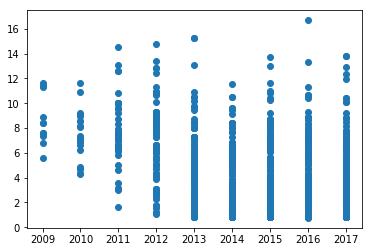

In [179]:
plt.scatter(table_c.Season, table_c.cap_pct)
plt.show()

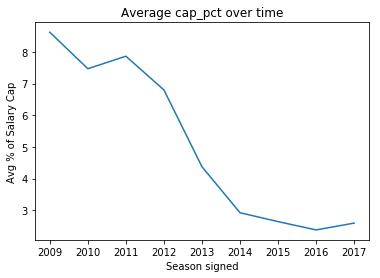

In [183]:
avg_cap_pct = table_c.groupby('Season')['cap_pct'].mean()
plt.plot(avg_cap_pct)
plt.title('Average cap_pct over time')
plt.xlabel('Season signed')
plt.ylabel('Avg % of Salary Cap')
plt.show()

I think this phenomenon can easily be explained by the fact that the data only contains players under contract in 2016 and 2017. Only really good players sign long-term contracts, so the only players in the data that signed contracts in those early years are naturally going to have higher cap hits.

In [192]:
table_c.Season.value_counts().iloc[:4].sum()

1171

In [334]:
table_rec = table_c[table_c.Season > 2013]

In [335]:
y = table_rec.cap_hit
X = table_rec[['signing_year_cap', 'forward', 'signing_age', 'Total Points', 'mean Total Points', 'GP']]

In [336]:
X = sm.add_constant(X)

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [338]:
model = sm.OLS(y_train.values, X_train.values)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     564.0
Date:                Thu, 28 Mar 2019   Prob (F-statistic):          1.27e-305
Time:                        13:24:02   Log-Likelihood:                -14150.
No. Observations:                 936   AIC:                         2.831e+04
Df Residuals:                     929   BIC:                         2.835e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.481e+06   7.47e+05      1.981      0.048    1.42e+04    2.95e+06
x1             0.0125      0.010      1.296      0.195      -0.006       0.031
x2         -8.769e+05   6.34e+04    -13.842      0.000      -1e+06   -7.53e+05
x3         -5.629e+04   9022.016     -6.239      0.000    -7.4e+04   -3.86e+04
x4          5.283e+04   4895.051     10.792      0.000    4.32e+04    6.24e+04
x5          6.357e+04   5374.356     11.828      0.000     5.3e+04    7.41e+04
x6         -7133.5198   1582.496     -4.508      0.000   -1.02e+04   -4027.838
==============================================================================
Omnibus:                      136.802   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.331
Skew:                           0.763   Prob(JB):                     7.70e-80
Kurtosis:                       5.648   Cond. No.                     1.92e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [339]:
preds = results.predict(X_test)

In [340]:
rmse(preds, y_test)

951706.2631654041

In [341]:
y = table_rec.cap_hit
X = table_rec[['signing_year_cap', 'forward', 'signing_age', 'Total Points', 'mean Total Points', 'GP']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

model = RandomForestRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse(preds, y_test)

944571.8350043416

In [342]:
y = table_rec.cap_hit
X = table_rec[['signing_year_cap', 'forward', 'signing_age', 'Total Points', 
               'mean Total Points', 'TOI/GP', 'GP', 
                 '3yr CF/60 Rel', '3yr SCF/60 Rel',]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

model = RandomForestRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse(preds, y_test)

815608.7793326974

In [343]:
X = table_rec[['signing_year_cap', 'forward', 'signing_age', 'Total Points', 
               'mean Total Points', 'TOI/GP', 'GP', 
                 '3yr CF/60 Rel', '3yr SCF/60 Rel',]]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

model = sm.OLS(y_train.values, X_train.values)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     425.9
Date:                Thu, 28 Mar 2019   Prob (F-statistic):          6.03e-322
Time:                        13:24:44   Log-Likelihood:                -14102.
No. Observations:                 936   AIC:                         2.822e+04
Df Residuals:                     926   BIC:                         2.827e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.151e+05    7.7e+05     -1.059      0.290   -2.33e+06    6.96e+05
x1             0.0192      0.009      2.081      0.038       0.001       0.037
x2         -2.736e+05   9.55e+04     -2.866      0.004   -4.61e+05   -8.62e+04
x3         -5.857e+04   8740.119     -6.701      0.000   -7.57e+04   -4.14e+04
x4          4.915e+04   4780.056     10.283      0.000    3.98e+04    5.85e+04
x5          5.804e+04   5414.577     10.719      0.000    4.74e+04    6.87e+04
x6          1.226e+05    1.4e+04      8.783      0.000    9.52e+04     1.5e+05
x7          -1.12e+04   1577.276     -7.099      0.000   -1.43e+04   -8101.520
x8         -1.737e+04   6821.258     -2.547      0.011   -3.08e+04   -3987.866
x9          -220.5535   1.14e+04     -0.019      0.985   -2.26e+04    2.22e+04
==============================================================================
Omnibus:                      117.821   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.028
Skew:                           0.706   Prob(JB):                     5.16e-60
Kurtosis:                       5.237   Cond. No.                     2.08e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [344]:
preds = results.predict(X_test)

In [345]:
rmse(preds, y_test)

890225.6090104161

In [348]:
table_c = table[['Player', 'Season', 'position', 'signing_age', 'signing_date', 
                'Total Points', 'mean Total Points', 'GP', 'TOI/GP', 
                 '3yr CF/60 Rel', '3yr CA/60 Rel', '3yr SCF/60 Rel',
                'cap_hit', 'cap_pct', 'length', 'signing_year_cap']]
table_rec = table_c[table_c.Season > 2013]

table_rec.dropna(inplace=True)

table_rec['skater'] = table_rec.position != 'Goaltender'
table_rec['forward'] = (table_rec.position != 'Goaltender') & (table_c.position != 'Defense')
table_rec.replace([True, False], [1, 0], inplace=True)


y = table_rec.cap_hit
X = table_rec[['signing_year_cap', 'forward', 'signing_age', 'Total Points', 
               'mean Total Points', 'TOI/GP', 'GP', 
                 '3yr CF/60 Rel', '3yr SCF/60 Rel', '3yr CA/60 Rel']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

model = RandomForestRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse(preds, y_test)

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

792784.6935174762

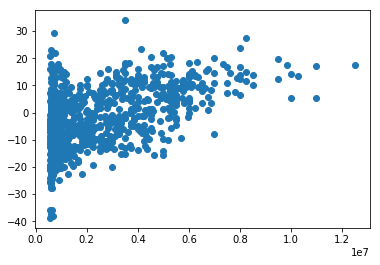

In [350]:
plt.scatter(table_rec.cap_hit, table_rec['3yr CF/60 Rel'])

In [368]:
table_rec = table[table.Season > 2013]

table_rec['skater'] = table_rec.position != 'Goaltender'
table_rec['forward'] = (table_rec.position != 'Goaltender') & (table_c.position != 'Defense')
table_rec.replace([True, False], [1, 0], inplace=True)

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

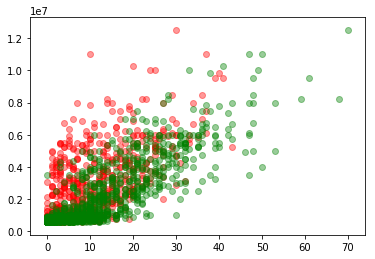

In [360]:
plt.scatter(table_rec['Goals'], table_rec.cap_hit, color = 'r', alpha =0.4)
plt.scatter(table_rec['Total Assists'], table_rec.cap_hit, color = 'g', alpha = 0.4)

plt.show()

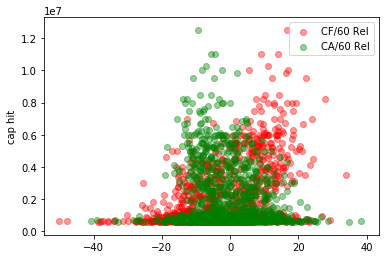

In [364]:
plt.scatter(table_rec['CF/60 Rel'], table_rec.cap_hit, color = 'r', alpha =0.4, label = 'CF/60 Rel')
plt.scatter(table_rec['CA/60 Rel'], table_rec.cap_hit, color = 'g', alpha = 0.4, label = 'CA/60 Rel')
plt.legend()
plt.ylabel('cap hit')
plt.show()

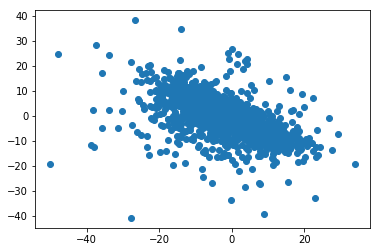

In [366]:
plt.scatter(table_rec['CF/60 Rel'], table_rec['CA/60 Rel'])
plt.show()

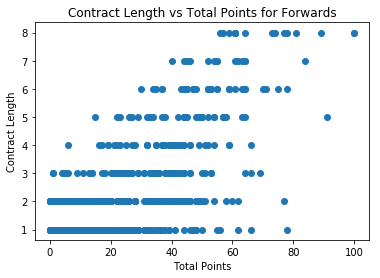

In [371]:
plt.scatter(table_rec[table_rec.forward == 1]['Total Points'], 
            table_rec[table_rec.forward == 1].length)
plt.xlabel('Total Points')
plt.ylabel('Contract Length')
plt.title('Contract Length vs Total Points for Forwards')
plt.show()

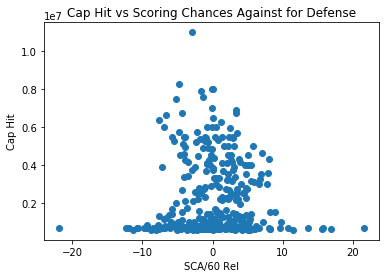

In [375]:
plt.scatter(table_rec[table_rec.forward == 0]['SCA/60 Rel'], 
            table_rec[table_rec.forward == 0].cap_hit)
plt.xlabel('SCA/60 Rel')
plt.ylabel('Cap Hit')
plt.title('Cap Hit vs Scoring Chances Against for Defense')
plt.show()

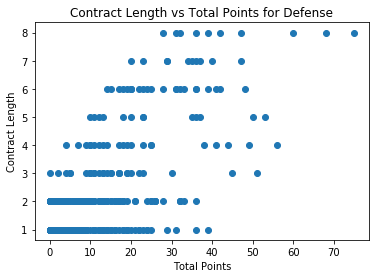

In [376]:
plt.scatter(table_rec[table_rec.forward == 0]['Total Points'], 
            table_rec[table_rec.forward == 0].length)
plt.xlabel('Total Points')
plt.ylabel('Contract Length')
plt.title('Contract Length vs Total Points for Defense')
plt.show()

In [382]:
df = pd.DataFrame(pst, columns = pst_cols)

In [385]:
tablerec2 = pd.merge(table_rec, df[['Season_Player', 'IPP']], how='left', on = 'Season_Player')

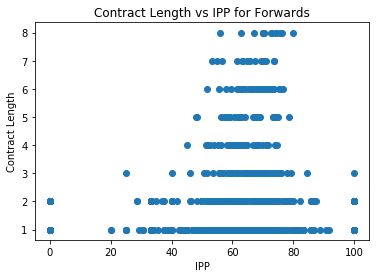

In [387]:
plt.scatter(tablerec2[tablerec2.forward == 1]['IPP'], 
            tablerec2[tablerec2.forward == 1].length)
plt.xlabel('IPP')
plt.ylabel('Contract Length')
plt.title('Contract Length vs IPP for Forwards')
plt.show()

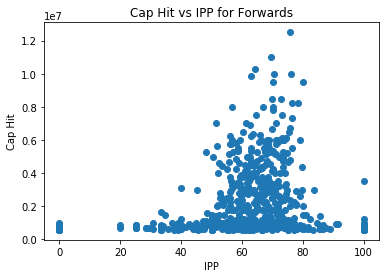

In [389]:
plt.scatter(tablerec2[tablerec2.forward == 1]['IPP'], 
            tablerec2[tablerec2.forward == 1].cap_hit)
plt.xlabel('IPP')
plt.ylabel('Cap Hit')
plt.title('Cap Hit vs IPP for Forwards')
plt.show()

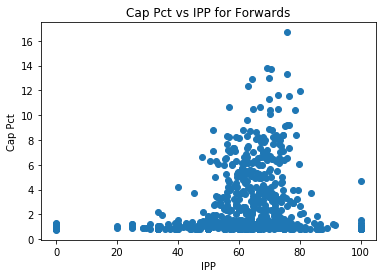

In [393]:
plt.scatter(tablerec2[tablerec2.forward == 1]['IPP'], 
            tablerec2[tablerec2.forward == 1].cap_pct)
plt.xlabel('IPP')
plt.ylabel('Cap Pct')
plt.title('Cap Pct vs IPP for Forwards')
plt.show()

In [391]:
tablerec2.to_csv('../data/thur_data.csv')

In [394]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

In [399]:
from sklearn.preprocessing import StandardScaler

In [405]:
X.describe()

,signing_year_cap,forward,signing_age,Total Points,mean Total Points,TOI/GP,GP,IPP,3yr CF/60 Rel,3yr SCF/60 Rel,3yr CA/60 Rel
count,1.170000e+03,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
mean,7.499462e+07,0.651282,26.160684,17.589744,15.749003,14.324467,47.078632,inf,-2.287402,-1.567803,-0.911855
std,3.010972e+06,0.476768,3.609913,18.403450,15.621551,3.961398,29.091560,NaN,9.995958,5.803216,7.627478
min,7.140000e+07,0.000000,19.000000,0.000000,0.000000,3.750000,1.000000,0.000000,-38.730000,-21.230000,-33.640000
25%,7.300000e+07,0.000000,24.000000,3.000000,3.375000,11.443393,17.000000,31.295000,-9.147500,-5.405000,-6.200000
50%,7.500000e+07,1.000000,25.000000,11.500000,10.666667,14.041972,53.000000,51.850000,-2.450000,-1.725000,-1.050000
75%,7.950000e+07,1.000000,28.000000,27.000000,23.666667,17.097981,75.000000,66.670000,4.412500,2.160000,4.090000
max,7.950000e+07,1.000000,45.000000,100.000000,85.000000,26.835569,84.000000,inf,33.970000,24.980000,34.810000


In [463]:
y = tablerec2.cap_hit
X = tablerec2[['signing_year_cap', 'forward', 'signing_age', 'Total Points', 
               'mean Total Points', 'TOI/GP', 'GP',
                 '3yr CF/60 Rel', '3yr SCF/60 Rel', '3yr CA/60 Rel']]

ss = StandardScaler()
X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)



In [574]:
knn = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')

In [575]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [576]:
preds = knn.predict(X_test)

In [577]:
rmse(preds, y_test)

803134.4934381761

In [492]:
rnr = RadiusNeighborsRegressor(radius = 0.67)
rnr.fit(X_train, y_train)


RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, p=2, radius=0.67, weights='uniform')

In [493]:
preds = rnr.predict(X_test)
round(rmse(preds, y_test), 0)

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


665164.0

In [717]:
y = tablerec2[tablerec2.forward == 1].cap_hit
X = tablerec2[tablerec2.forward == 1][['Total Points', 
               'mean Total Points', 'TOI/GP', 'GP',
                 '3yr CF/60 Rel', '3yr SCF/60 Rel', '3yr CA/60 Rel']]

ss = StandardScaler()
X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

r = 1
rnr = RadiusNeighborsRegressor(radius = r, weights='uniform')
rnr.fit(X_train, y_train)
preds = rnr.predict(X_test)
print(len(rnr.radius_neighbors(X_train[0].reshape(1,-1), radius = r)[0][0]))
err = round(rmse(preds, y_test), 0)
print(err, '      ', len(str(err))-2)

3
747898.0        6


/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [716]:
y = tablerec2[tablerec2.forward == 0].cap_hit
X = tablerec2[tablerec2.forward == 0][['Total Points', 
               'mean Total Points', 'TOI/GP', 'GP',
                 '3yr CF/60 Rel', '3yr SCF/60 Rel', '3yr CA/60 Rel']]

ss = StandardScaler()
X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

r = 1
rnr = RadiusNeighborsRegressor(radius = r, weights='uniform')
rnr.fit(X_train, y_train)
preds = rnr.predict(X_test)
print(len(rnr.radius_neighbors(X_train[0].reshape(1,-1), radius = r)[0][0]))
err = round(rmse(preds, y_test), 0)
print(err, '      ', len(str(err))-2)

11
835667.0        6


/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [684]:
len(rnr.radius_neighbors(X_train[0].reshape(1,-1), radius = 1)[0][0])

6

In [583]:
preds = rnr.predict(X_test)
rmse(preds, y_test)

1235670.1905465769

In [549]:
def rmsle(yhat, y):
    return np.sqrt((np.log(yhat - y)**2).mean())

In [712]:
tablerec2.cap_hit.std()

1942134.0743911595